<a href="https://colab.research.google.com/github/HarshaLLabade/My_Projects/blob/main/4C_Auto_Insurance_Claims_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/HarshaLLabade/ICT/main/Data%20sets/insurance_claims.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
# Finding all the columns with 'object' data type
Objt_features=[]
for i in range(len(df.columns)):
  if df[df.columns[i]].dtype=='object':
    Objt_features.append(df.columns[i])

Objt_features

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [ ]:
# Checking value counts for each object data type feature to find any suspicious record
for i in range(len(Objt_features)):
  print(df[Objt_features[i]].value_counts())

policy_bind_date
2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: count, Length: 951, dtype: int64
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: coun

In [ ]:
## Problematic features are 'collision_type','property_damage' and 'police_report_availabel'.

In [ ]:
# Finding all the columns with 'int' data type
Int_features=[]
for i in range(len(df.columns)):
  if df[df.columns[i]].dtype=='int64':
    Int_features.append(df.columns[i])

Int_features

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

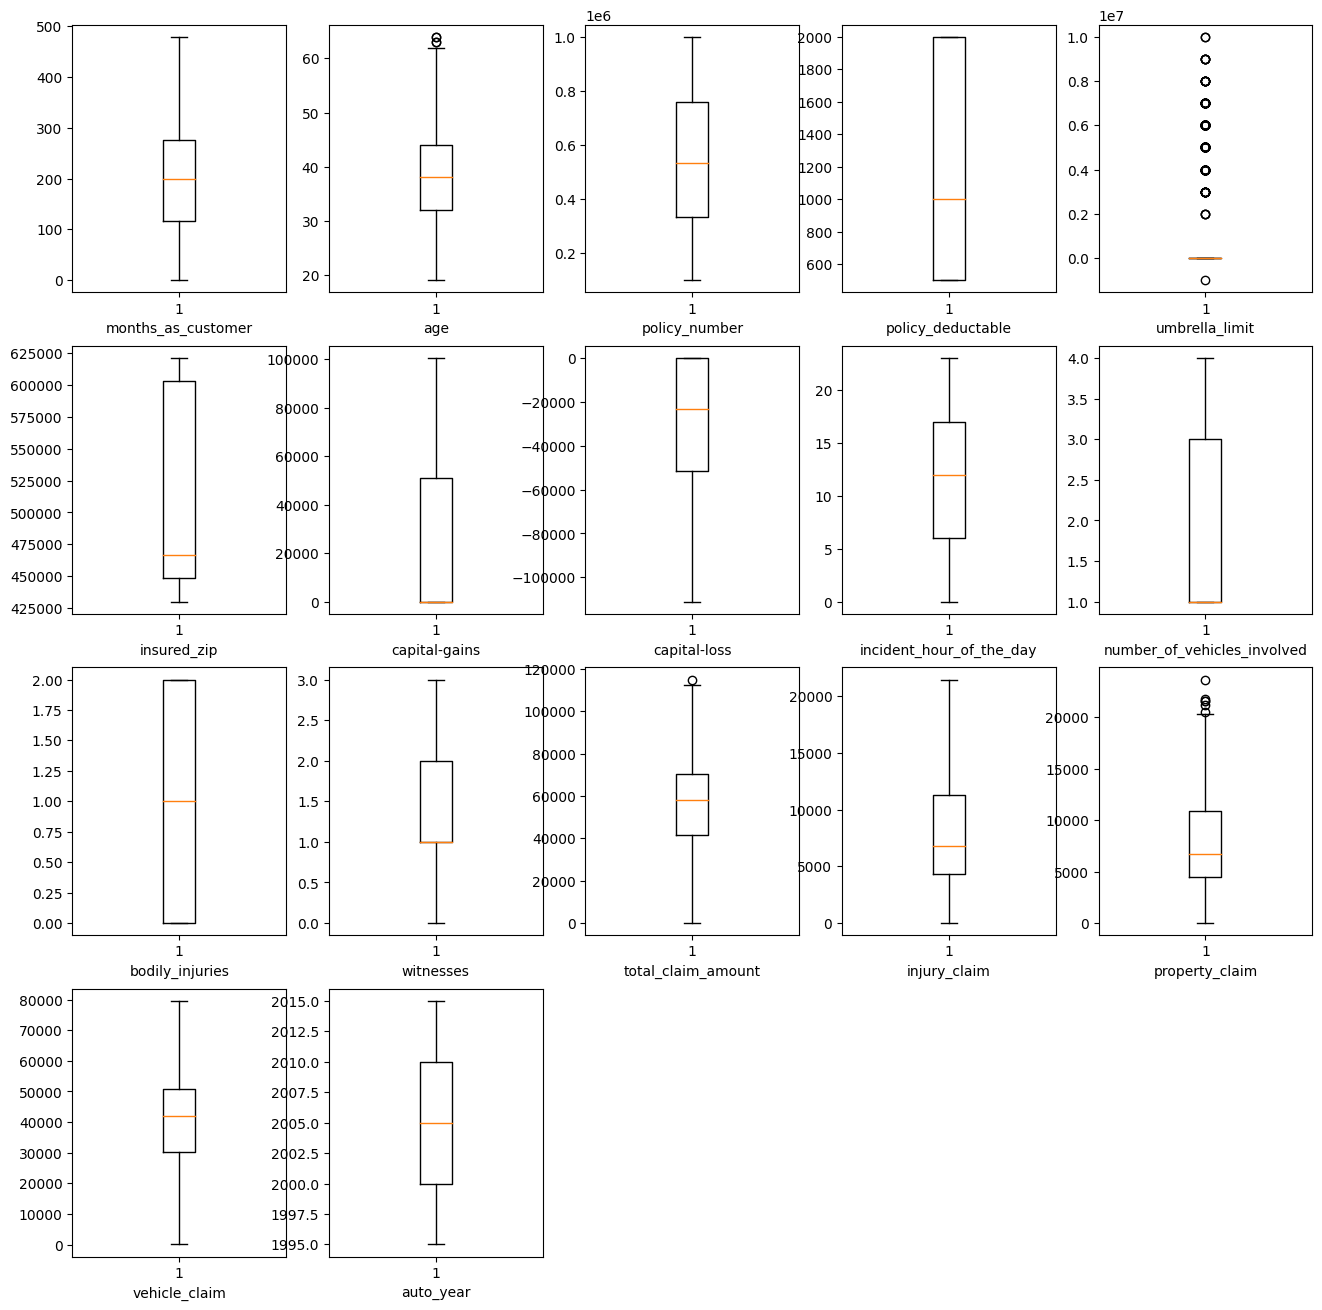

In [ ]:
## Box plots for each integer data type feature
plt.figure(figsize=[16,16])
for i in range(len(Int_features)):
  plt.subplot(4,5,i+1)
  plt.xlabel(Int_features[i])
  plt.boxplot(df[Int_features[i]])

In [ ]:
## Outliers presents in "age","umbrella_unit","total_claim_amount" and "property_claim".

In [ ]:
# Checking value counts for each integer data type feature to find any suspicious record
for i in range(len(Int_features)):
  print(df[Int_features[i]].value_counts())

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64
policy_deductable
1000    351
500     342
2000    307
Name: count, dtype: int64
umbrella_limit
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8

In [ ]:
## Here only the 'umbrella_limit' is different.

In [ ]:
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [ ]:
df["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [ ]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [ ]:
df=df.drop(["_c39"],axis=1) ## '_c39' is just a junk column in our data it doesn't contain any important information.
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fece0011120>,
 'caps': [<matplotlib.lines.Line2D at 0x7fece0011660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fece0010e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fece0011ba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fece0011e40>],
 'means': []}

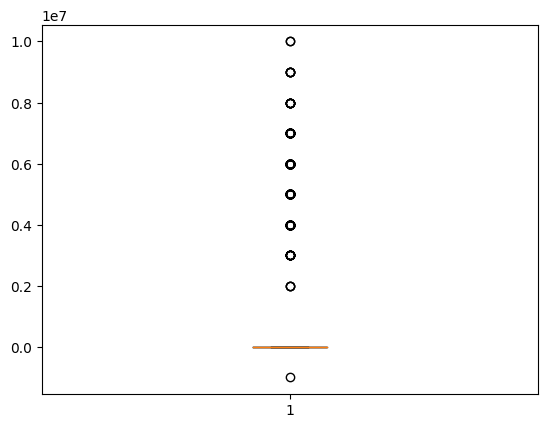

In [ ]:
plt.boxplot(df["umbrella_limit"])

In [ ]:
df["umbrella_limit"].quantile([0,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,1])

0.00    -1000000.0
0.71           0.0
0.72           0.0
0.73           0.0
0.74           0.0
0.75           0.0
0.76           0.0
0.77           0.0
0.78           0.0
0.79           0.0
0.80     2000000.0
0.81     3000000.0
0.82     4000000.0
0.83     4000000.0
0.84     4000000.0
0.85     4000000.0
0.86     5000000.0
0.87     5000000.0
0.88     5000000.0
0.89     5000000.0
1.00    10000000.0
Name: umbrella_limit, dtype: float64

In [ ]:
## Only one negative entry and almost 79% values in the 'umbrella_limit' column are zero.
# First we find that negative entry and remove that entry.
mask=df['umbrella_limit'] < 0
df[mask]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,1995-05-04,OH,100/300,500,1338.54,-1000000,438178,...,1,?,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [ ]:
df.drop(df.index[290],inplace=True)
df.shape

(999, 39)

In [ ]:
# Checking the relation of 'collision_type' and 'fraud_reported' using crosstabing.
d_1=pd.crosstab(df["collision_type"],df["fraud_reported"])
d_1.astype(float).div(d_1.sum(axis=1),axis=0)   # Just to get in the form of probability vales

fraud_reported,N,Y
collision_type,,
?,0.910112,0.089888
Front Collision,0.724409,0.275591
Rear Collision,0.688356,0.311644
Side Collision,0.745455,0.254545


In [ ]:
## Now we encode the different type of collision, this helps in such a way that all entries of type "?" replace with null entries
df['collision_type']=df['collision_type'].map({"Front Collision":0,"Rear Collision":1,"Side Collision":2})

In [ ]:
(df['collision_type'].isnull().sum())/len(df['collision_type'])    # Approximately 17% are null values are created in the process

0.1781781781781782

In [ ]:
# From above comparision we in a confusion that what is the best replacement of the null values, so we assigne randomly the number from 0 to 2.
for i,data in df.iterrows():
  if pd.isnull(data['collision_type']):
    df.at[i,'collision_type']=np.random.randint(0,3)

In [ ]:
# Now we recheck the croostab if there are any changes in the proportion and we observe that no significant changes
d_1=pd.crosstab(df["collision_type"],df["fraud_reported"])
d_1.astype(float).div(d_1.sum(axis=1),axis=0)

fraud_reported,N,Y
collision_type,,
0.0,0.754902,0.245098
1.0,0.736559,0.263441
2.0,0.769470,0.230530


In [ ]:
# Checking the relation of 'police_report_available' and 'fraud_reported' using crosstabing.
d_2=pd.crosstab(df["police_report_available"],df["fraud_reported"])
d_2.astype(float).div(d_2.sum(axis=1),axis=0)

fraud_reported,N,Y
police_report_available,,
?,0.739766,0.260234
NO,0.749271,0.250729
YES,0.770701,0.229299


In [ ]:
mask=df["police_report_available"]=="?"
(df["police_report_available"][mask].value_counts())/len(df) # Total percentage of the values.

police_report_available
?    0.342342
Name: count, dtype: float64

In [ ]:
# Since values of "?" are similar with values of "NO", so replace "?" with "NO"
df["police_report_available"].replace(to_replace="?", value="NO",inplace=True)

In [ ]:
d_2=pd.crosstab(df["police_report_available"],df["fraud_reported"])
d_2.astype(float).div(d_2.sum(axis=1),axis=0)   # No significant change in the original crosstab

fraud_reported,N,Y
police_report_available,,
NO,0.744526,0.255474
YES,0.770701,0.229299


In [ ]:
d_3=pd.crosstab(df["property_damage"],df["fraud_reported"])
d_3.astype(float).div(d_3.sum(axis=1),axis=0)

fraud_reported,N,Y
property_damage,,
?,0.713889,0.286111
NO,0.804734,0.195266
YES,0.740864,0.259136


In [ ]:
df['property_damage']=df['property_damage'].map({"YES":1,"NO":0})

In [ ]:
(df['property_damage'].isnull().sum())/len(df)

0.36036036036036034

In [ ]:
## Replace "?" with number 0 or 1 randomly.
for i,data in df.iterrows():
  if pd.isnull(data['property_damage']):
    df.at[i,'property_damage']=np.random.randint(0,2)

In [ ]:
d_3=pd.crosstab(df["property_damage"],df["fraud_reported"])
d_3.astype(float).div(d_3.sum(axis=1),axis=0)

fraud_reported,N,Y
property_damage,,
0.0,0.778828,0.221172
1.0,0.723404,0.276596


In [ ]:
df_1=df.copy()
df_1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
df_1=df.copy()
df_1= df_1.drop(['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies',
                 'insured_relationship','incident_date','incident_type','incident_severity','authorities_contacted','incident_state',
                 'incident_city','incident_location','police_report_available','auto_make','auto_model','fraud_reported'],axis=1)

<Axes: >

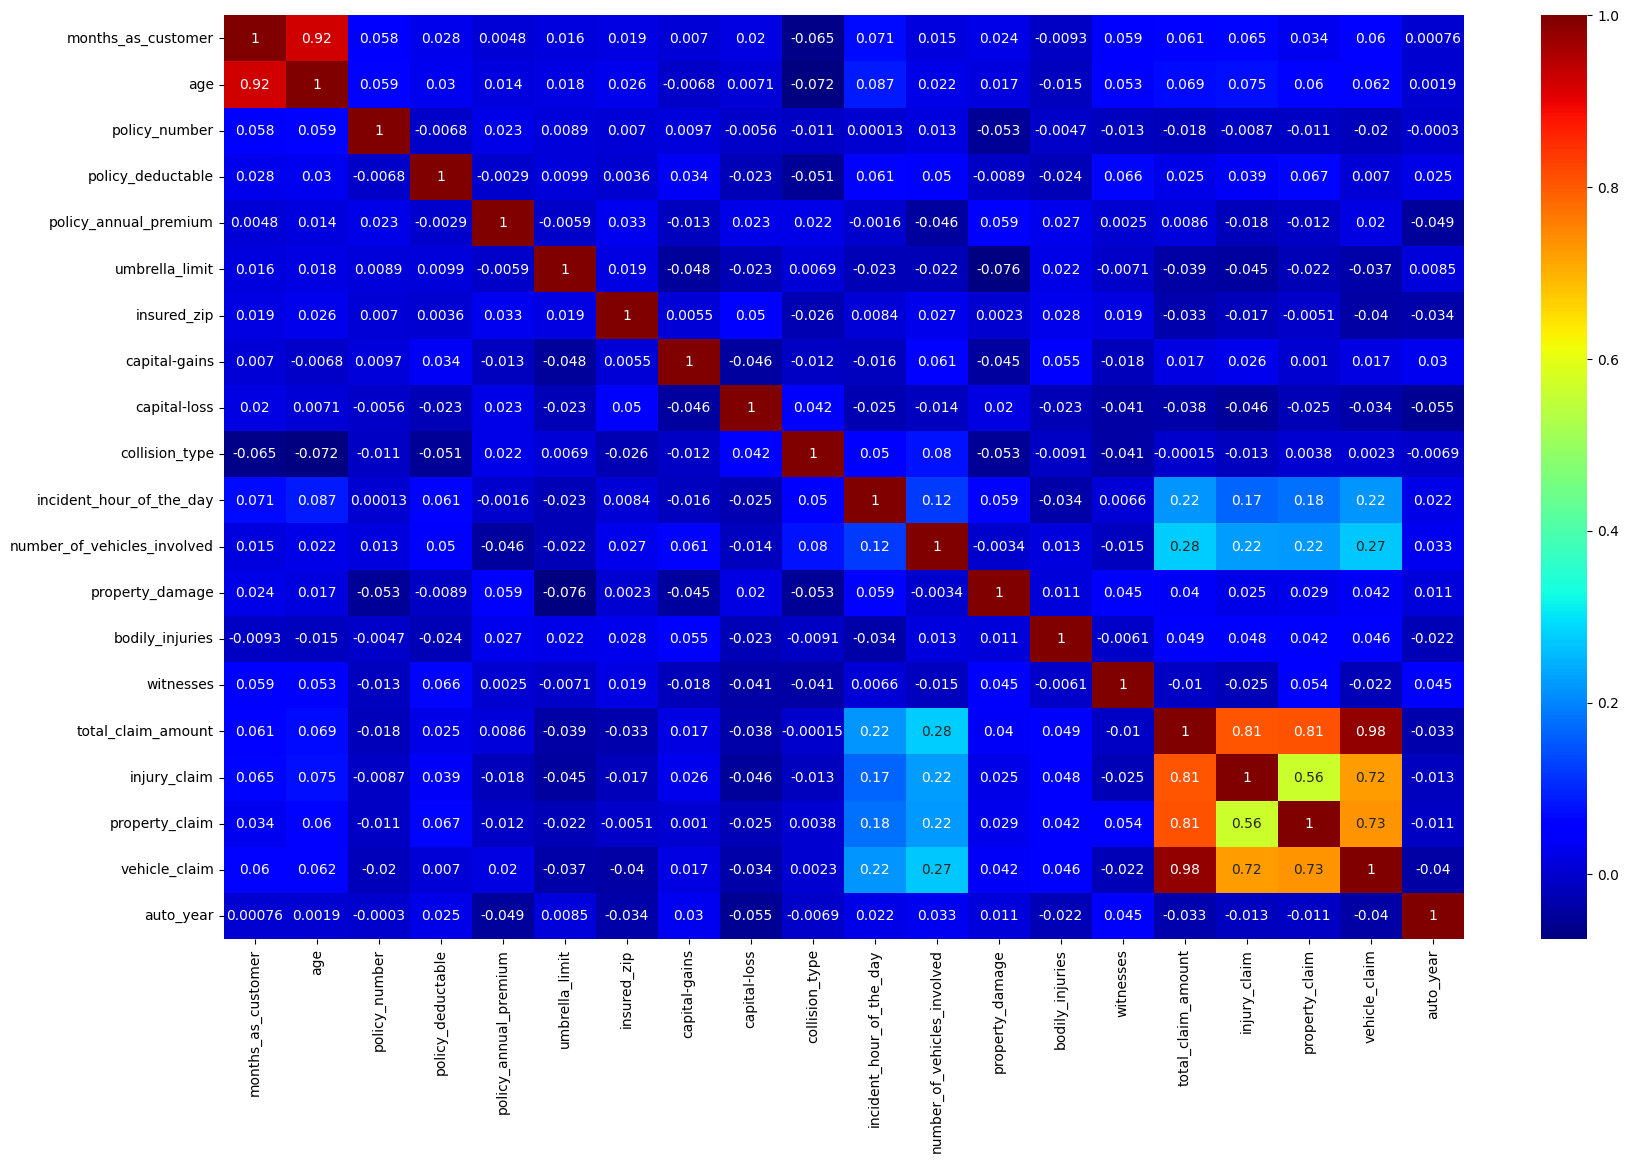

In [ ]:
plt.figure(figsize=[20,12])
sns.heatmap(df_1.corr(),annot=True,cmap="jet")

In [ ]:
#   Here we observe that in "age" and "months_as_customer" there is high correlation, so we can drop one of them.
#  We drop "age" column. Also there is high correlation between "total_claim_amount" with "injury_claim",
# "property_claim" and "vehicle_claim". So we drop here "total_claim_amount" observed to be the addition of all the three claim columns.
df_1=df_1.drop(['age','total_claim_amount'],axis=1)

<Axes: >

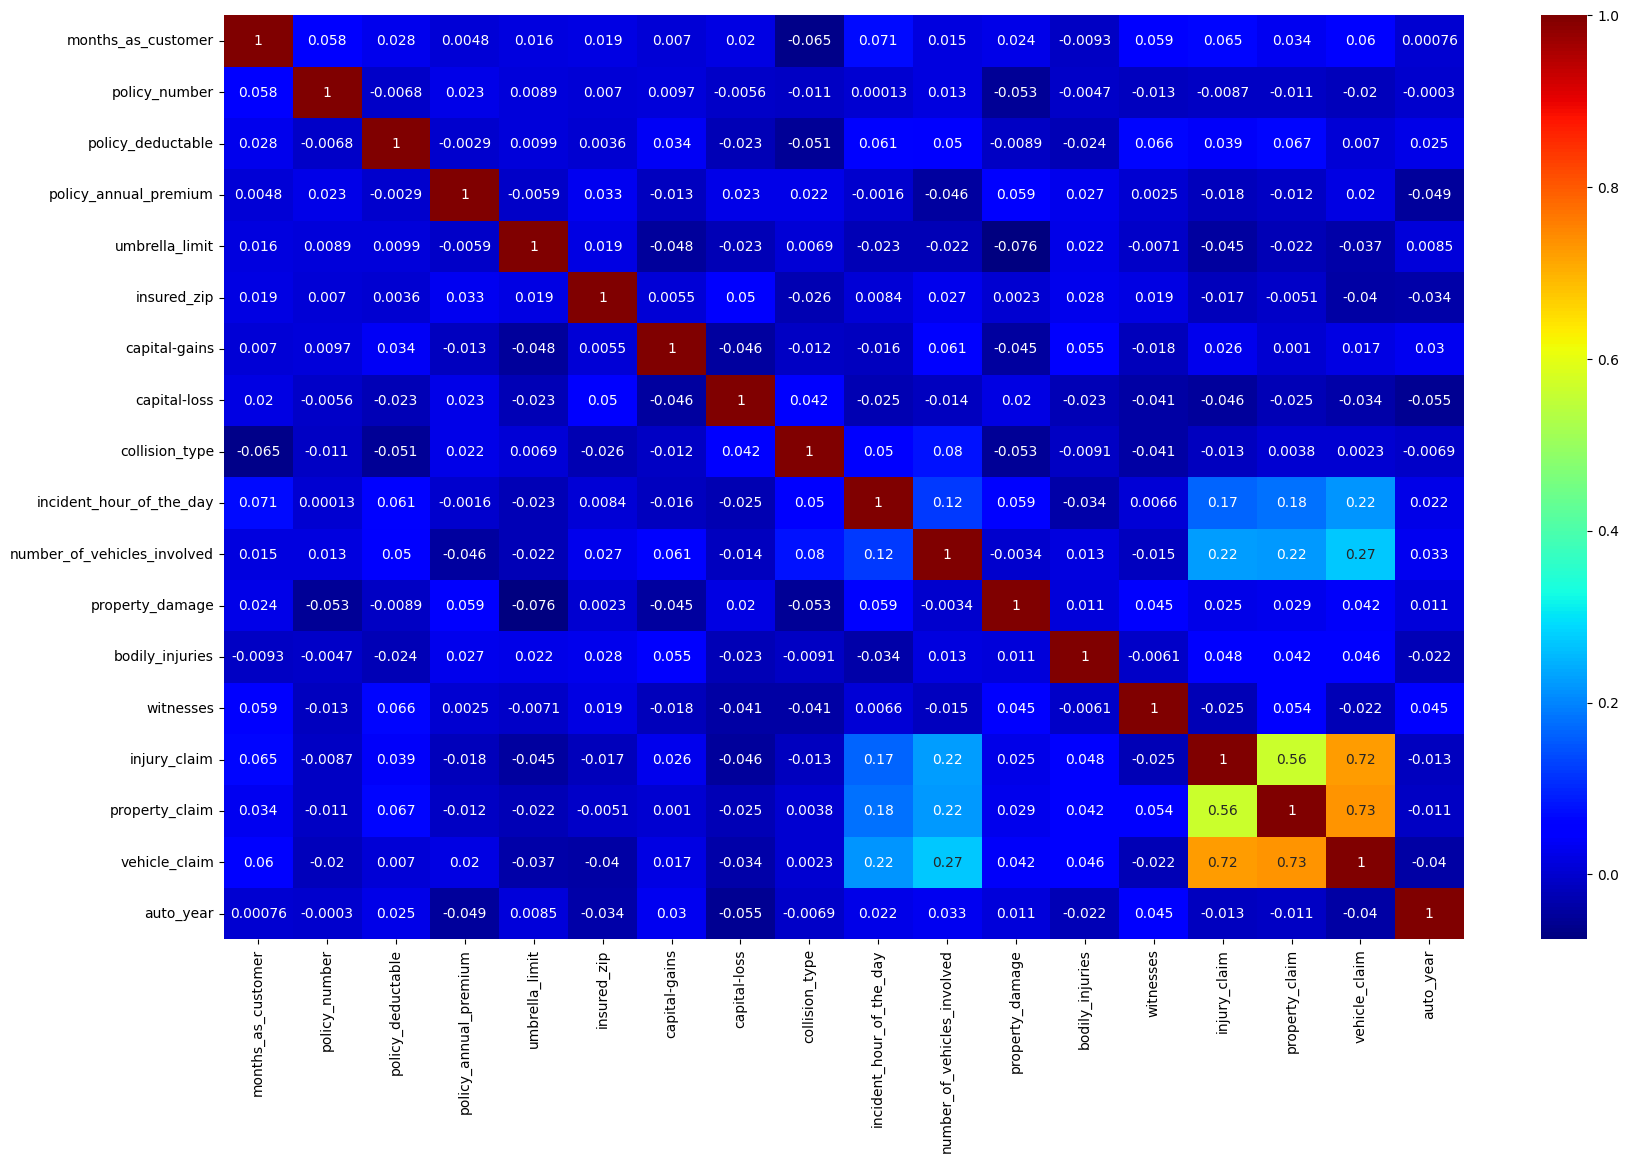

In [ ]:
plt.figure(figsize=[20,12])
sns.heatmap(df_1.corr(),annot=True,cmap="jet")

In [ ]:
# Highly corelated with other variables so drop from the original data after making its copy
df_2 = df.copy()
df_2 = df_2.drop(['age','total_claim_amount'],axis=1)

In [ ]:
#df['property_claim'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
df_2['property_claim'].quantile([0,0.25,0.75,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

0.000        0.00
0.250     4440.00
0.750    10870.00
0.991    19655.40
0.992    19955.28
0.993    20280.42
0.994    20312.88
0.995    20556.90
0.996    21242.72
0.997    21580.30
0.998    21630.72
0.999    21813.72
1.000    23670.00
Name: property_claim, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcd24c6c280>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcd26fd73a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcd24c6c6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcd26fd7d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcd26fd6b60>],
 'means': []}

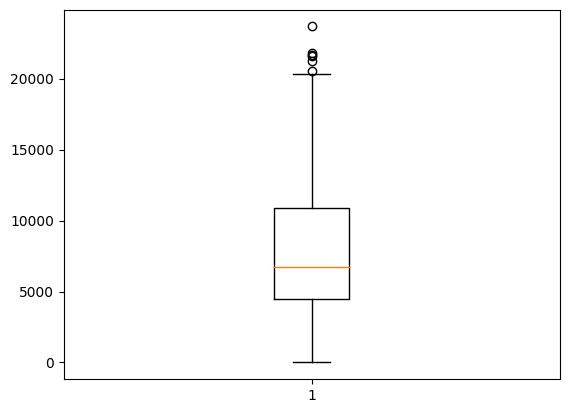

In [ ]:
plt.boxplot(df['property_claim'])

In [ ]:
## If we assume that the range for the variable "property_claim" is upto 20000 then 99.2% data is valid and else are consider as outliers
Q1=df_2['property_claim'].quantile(0.25)
Q3=df_2['property_claim'].quantile(0.75)

for i,data in df_2.iterrows():
  if df_2['property_claim'][i] > 20000:
    df_2.at[i,'property_claim']=np.random.randint(Q1,Q3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcd26d951e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcd26d95720>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcd29e810f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcd26d95c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcd26d95f00>],
 'means': []}

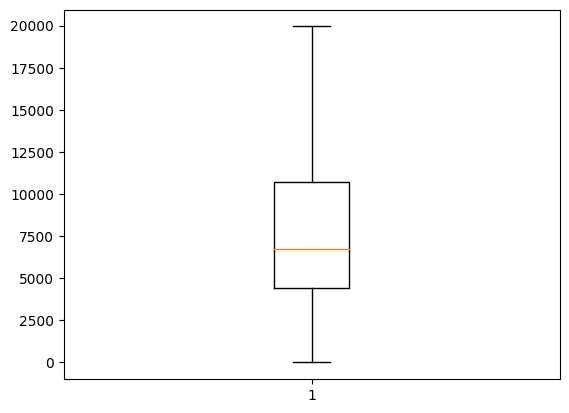

In [ ]:
plt.boxplot(df_2['property_claim'])

In [ ]:
df_2['fraud_reported']=df_2['fraud_reported'].map({"Y":1,"N":0})

In [ ]:
Encoded_df=df_2.copy()

In [ ]:
Encoded_df=pd.get_dummies(Encoded_df,columns=["police_report_available", "insured_sex","property_damage","auto_make", "policy_state",
  "insured_hobbies", "insured_education_level","incident_type","incident_location", "insured_relationship","incident_severity",
   "collision_type","incident_city","incident_state", "authorities_contacted","insured_occupation","auto_model","policy_csl"])


In [ ]:
x = Encoded_df.drop(['policy_bind_date','incident_date','fraud_reported'], axis = 1)
y = Encoded_df['fraud_reported']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train_res,y_train_res=sm.fit_resample(x_train,y_train.ravel())

600
600


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

lr1=LogisticRegression()
lr1.fit(x_train_res,y_train_res.ravel())
predictions=lr1.predict(x_test)

# print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.55      0.65       152
           1       0.30      0.60      0.40        48

    accuracy                           0.56       200
   macro avg       0.55      0.58      0.53       200
weighted avg       0.69      0.56      0.59       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(max_depth=5,criterion='entropy')
tree_model.fit(x_train_res,y_train_res.ravel())
tree_yhat=tree_model.predict(x_test)
print(classification_report(y_test,tree_yhat))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       152
           1       0.62      0.71      0.66        48

    accuracy                           0.82       200
   macro avg       0.76      0.79      0.77       200
weighted avg       0.83      0.82      0.83       200



In [ ]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
n=5
Knn=KNeighborsClassifier(n_neighbors=n)
Knn.fit(x_train_res,y_train_res.ravel())
Knn_yhat=Knn.predict(x_test)
print(classification_report(y_test,Knn_yhat))


              precision    recall  f1-score   support

           0       0.74      0.51      0.61       152
           1       0.22      0.44      0.29        48

    accuracy                           0.49       200
   macro avg       0.48      0.48      0.45       200
weighted avg       0.62      0.49      0.53       200



In [ ]:
# Random Forest Tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=4,random_state=0)
rf.fit(x_train_res,y_train_res.ravel())
rf_yhat=rf.predict(x_test)
print(classification_report(y_test,rf_yhat))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       152
           1       0.62      0.38      0.47        48

    accuracy                           0.80       200
   macro avg       0.72      0.65      0.67       200
weighted avg       0.78      0.80      0.78       200



In [ ]:
# SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train_res,y_train_res.ravel())
svm_yhat=svm.predict(x_test)
print(classification_report(y_test,svm_yhat))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       152
           1       0.27      0.23      0.25        48

    accuracy                           0.67       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.65      0.67      0.66       200

